<a href="https://colab.research.google.com/github/data2450/KPMG-dataset/blob/main/kpmg_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import pandas as pd
import numpy as np
from pandas import ExcelWriter
from pandas import ExcelFile

import datetime
from matplotlib.dates import DateFormatter
import datetime
from matplotlib.dates import DateFormatter

In [43]:
url='https://github.com/data2450/KPMG-dataset/blob/main/KPMG_VI_New_raw_data_update_final%20(1).xlsx?raw=true'

In [44]:
transitiondata=pd.read_excel(url,sheet_name='Transactions')

In [45]:
coustmer_data=pd.read_excel(url,sheet_name='CustomerDemographic')

In [46]:
coustmer_data.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [47]:
transitiondata['customer_id'].nunique()
#we have only 3494 unique coustmer transitiondetails in transitiondata 

3494

In [48]:
transitiondata.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [49]:
transitiondata.info()
#there are some missing data lets check it out

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [50]:
transitiondata.shape

(20000, 13)

In [51]:
coustmer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [52]:
len(coustmer_data['customer_id'].unique())

4000

# Missing values

In [53]:
#lets first look at the coustmer dataset missing values
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na_c=[features for features in coustmer_data.columns if coustmer_data[features].isnull().sum()>=1]
## 2- step print the feature name and the percentage of missing values

for feature in features_with_na_c:
    print(feature, np.round(coustmer_data[feature].isnull().mean(),4),  ' % missing values')

last_name 0.0312  % missing values
DOB 0.0217  % missing values
job_title 0.1265  % missing values
job_industry_category 0.164  % missing values
default 0.0755  % missing values
tenure 0.0217  % missing values


In [54]:
#we cannot simply drop this values because the coutmer id is unique if drop any row then one coustmer will be droped this will affect our analysis
#lets check the missing values in transaction data
features_with_na=[features for features in transitiondata.columns if transitiondata[features].isnull().sum()>=1]
for feature in features_with_na:
    print(feature, np.round(transitiondata[feature].isnull().mean(),4),  ' % missing values')

online_order 0.018  % missing values
brand 0.0098  % missing values
product_line 0.0098  % missing values
product_class 0.0098  % missing values
product_size 0.0098  % missing values
standard_cost 0.0098  % missing values
product_first_sold_date 0.0098  % missing values


In [55]:
for feature in features_with_na:
  print(feature,transitiondata[feature].isnull().sum())


online_order 360
brand 197
product_line 197
product_class 197
product_size 197
standard_cost 197
product_first_sold_date 197


In [56]:
features_with_na

['online_order',
 'brand',
 'product_line',
 'product_class',
 'product_size',
 'standard_cost',
 'product_first_sold_date']

In [57]:

#lets drop the nan values
transitiondata=transitiondata.dropna(subset=['product_first_sold_date'])

In [58]:
transitiondata.shape

(19803, 13)

In [59]:
for feature in features_with_na:
  print(feature,transitiondata[feature].isnull().sum())


online_order 358
brand 0
product_line 0
product_class 0
product_size 0
standard_cost 0
product_first_sold_date 0


In [60]:
##'date' column in the dataset is not in correct format
## lets change it into orginal format
def xldate_to_datetime(xldate):
	temp = datetime.datetime(1899, 12, 30)
	delta = datetime.timedelta(days=xldate)
	return temp+delta

In [61]:
##apply above function to dataset
transitiondata['product_first_sold_date']=transitiondata['product_first_sold_date'].apply(xldate_to_datetime)

In [62]:
transitiondata['product_first_sold_date']

0       2012-12-02
1       2014-03-03
2       1999-07-20
3       1998-12-16
4       2015-08-10
           ...    
19995   2003-07-21
19996   1997-05-10
19997   2010-08-20
19998   2004-08-17
19999   1999-06-23
Name: product_first_sold_date, Length: 19803, dtype: datetime64[ns]

In [63]:
#there are some more missing values in online_order
transitiondata=transitiondata.fillna('missing')

In [64]:
for feature in features_with_na:
  print(feature,transitiondata[feature].isnull().sum())


online_order 0
brand 0
product_line 0
product_class 0
product_size 0
standard_cost 0
product_first_sold_date 0


In [65]:
transitiondata['customer_id'].nunique()
#no missing unique coustmer 

3494

In [66]:
transitiondata['online_order'].value_counts()

1.0        9739
0.0        9706
missing     358
Name: online_order, dtype: int64

In [67]:
transitiondata.head(10)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02
1,2,3,3120,2017-05-21,1,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03
2,3,37,402,2017-10-16,0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20
3,4,88,3135,2017-08-31,0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-16
4,5,78,787,2017-10-01,1,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-10
5,6,25,2339,2017-03-08,1,Approved,Giant Bicycles,Road,medium,medium,1538.99,829.65,2006-11-10
6,7,22,1542,2017-04-21,1,Approved,WeareA2B,Standard,medium,medium,60.34,45.26,1993-07-15
7,8,15,2459,2017-07-15,0,Approved,WeareA2B,Standard,medium,medium,1292.84,13.44,2009-04-12
8,9,67,1305,2017-08-10,0,Approved,Solex,Standard,medium,large,1071.23,380.74,1991-08-05
9,10,12,3262,2017-08-30,1,Approved,WeareA2B,Standard,medium,medium,1231.15,161.60,2004-08-17


In [68]:
transitiondata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19803 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19803 non-null  int64         
 1   product_id               19803 non-null  int64         
 2   customer_id              19803 non-null  int64         
 3   transaction_date         19803 non-null  datetime64[ns]
 4   online_order             19803 non-null  object        
 5   order_status             19803 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               19803 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [69]:
len(transitiondata['customer_id'].unique())
#there are only 3494 unique coustmers in transitiondata

3494

In [70]:
transitiondata['online_order'].replace(0.0, 'FALSE', inplace = True)
transitiondata['online_order'].replace(1.0,'TRUE', inplace = True)



In [71]:
transitiondata['online_order'].unique()

array(['FALSE', 'TRUE', 'missing'], dtype=object)

# coustmerdata

In [72]:

for feature in features_with_na_c:
  print(feature,coustmer_data[feature].isnull().sum())


last_name 125
DOB 87
job_title 506
job_industry_category 656
default 302
tenure 87


In [73]:
coustmer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [74]:
features_with_na_ch=('last_name','job_title','job_industry_category')

In [75]:
coustmer_data['last_name']=coustmer_data['last_name'].fillna('missing')
coustmer_data['job_title']=coustmer_data['job_title'].fillna('missing')
coustmer_data['job_industry_category']=coustmer_data['job_industry_category'].fillna('missing')

In [76]:

for feature in features_with_na_c:
  print(feature,coustmer_data[feature].isnull().sum())


last_name 0
DOB 87
job_title 0
job_industry_category 0
default 302
tenure 87


In [77]:
print(coustmer_data['default'].value_counts())
#the default column doesn't make any sense lets drop that column
coustmer_data=coustmer_data.drop('default',axis=1)

100                                       113
1                                         112
-1                                        111
-100                                       99
Ù¡Ù¢Ù£                                     53
                                         ... 
ç¤¾æç§å­¸é¢èªå­¸ç ç©¶æ                     31
/dev/null; touch /tmp/blns.fail ; echo     30
âªâªtestâª                                 29
ì¸ëë°í ë¥´                                 27
,ãã»:*:ã»ãâ( â» Ï â» )ãã»:*:ã»ãâ           25
Name: default, Length: 90, dtype: int64


In [78]:
coustmer_data.info()
#we have droped the default column
#now we have missing values in DOB and tenure columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            4000 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            4000 non-null   object        
 7   job_industry_category                4000 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  owns_car    

# EDA

In [79]:
coustmer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            4000 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            4000 non-null   object        
 7   job_industry_category                4000 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  owns_car    

In [80]:
coustmer_data['DOB'].items

<bound method Series.items of 0      1953-10-12
1      1980-12-16
2      1954-01-20
3      1961-10-03
4      1977-05-13
          ...    
3995   1975-08-09
3996   2001-07-13
3997          NaT
3998   1973-10-24
3999   1991-11-05
Name: DOB, Length: 4000, dtype: datetime64[ns]>

In [81]:
#lets bulid a new column age
import datetime as DT
import io
now = pd.Timestamp('now')
coustmer_data['DOB'] = pd.to_datetime(coustmer_data['DOB'], format='%m%d%y')    # 1
coustmer_data['DOB'] = coustmer_data['DOB'].where(coustmer_data['DOB'] < now, coustmer_data['DOB'] -  np.timedelta64(100, 'Y'))   # 2
coustmer_data['age'] = (now - coustmer_data['DOB']).astype('<m8[Y]')    # 3
print(coustmer_data.head())

   customer_id      first_name  last_name  ... owns_car  tenure   age
0            1         Laraine  Medendorp  ...      Yes    11.0  66.0
1            2             Eli    Bockman  ...      Yes    16.0  39.0
2            3           Arlin     Dearle  ...      Yes    15.0  66.0
3            4          Talbot    missing  ...       No     7.0  59.0
4            5  Sheila-kathryn     Calton  ...      Yes     8.0  43.0

[5 rows x 13 columns]


In [82]:
coustmer_data['age']

0       66.0
1       39.0
2       66.0
3       59.0
4       43.0
        ... 
3995    45.0
3996    19.0
3997     NaN
3998    46.0
3999    28.0
Name: age, Length: 4000, dtype: float64

In [83]:
coustmer_data['tenure'].value_counts()

7.0     235
5.0     228
11.0    221
10.0    218
16.0    215
8.0     211
18.0    208
12.0    202
9.0     200
14.0    200
6.0     192
13.0    191
4.0     191
17.0    182
15.0    179
1.0     166
3.0     160
19.0    159
2.0     150
20.0     96
22.0     55
21.0     54
Name: tenure, dtype: int64

In [84]:
#lets check the gender column
coustmer_data['gender'].unique()
#here F,Femal are Female and M is Male 

array(['F', 'Male', 'Female', 'U', 'Femal', 'M'], dtype=object)

In [85]:
coustmer_data['gender'].replace('Femal', 'Female', inplace = True)
coustmer_data['gender'].replace('F', 'Female', inplace = True)
coustmer_data['gender'].replace('M','Male', inplace = True)


In [86]:
coustmer_data['gender'].unique()

array(['Female', 'Male', 'U'], dtype=object)

In [87]:
#check the counts
coustmer_data['gender'].value_counts()

Female    2039
Male      1873
U           88
Name: gender, dtype: int64

In [88]:
coustmer_data['wealth_segment'].value_counts()

Mass Customer        2000
High Net Worth       1021
Affluent Customer     979
Name: wealth_segment, dtype: int64

In [107]:
coustmer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            4000 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            4000 non-null   object        
 7   job_industry_category                4000 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  owns_car    

In [113]:
#lets check the coustmerid of the missing values
is_NaN = coustmer_data.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = coustmer_data[row_has_NaN]

rows_with_NaN.head(10)


,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age
143,144,Jory,Barrabeale,U,71,NaT,Environmental Tech,IT,Mass Customer,N,No,NaN,NaN
167,168,Reggie,Broggetti,U,8,NaT,General Manager,IT,Affluent Customer,N,Yes,NaN,NaN
266,267,Edgar,Buckler,U,53,NaT,missing,IT,High Net Worth,N,No,NaN,NaN
289,290,Giorgio,Kevane,U,42,NaT,Senior Sales Associate,IT,Mass Customer,N,No,NaN,NaN
450,451,Marlow,Flowerdew,U,37,NaT,Quality Control Specialist,IT,High Net Worth,N,No,NaN,NaN
452,453,Cornelius,Yarmouth,U,81,NaT,Assistant Professor,IT,High Net Worth,N,No,NaN,NaN
453,454,Eugenie,Domenc,U,58,NaT,Research Nurse,Health,Affluent Customer,N,Yes,NaN,NaN
479,480,Darelle,Ive,U,67,NaT,Registered Nurse,Health,Mass Customer,N,Yes,NaN,NaN
512,513,Kienan,Soar,U,30,NaT,Tax Accountant,IT,Mass Customer,N,No,NaN,NaN
525,526,Ardelle,missing,U,9,NaT,Social Worker,Health,Mass Customer,N,Yes,NaN,NaN


In [112]:
print(len(rows_with_NaN))
rows_with_NaN['customer_id'].nunique()
#if we drop these rows we will lose 88 coustmer details , all of them has bike related purchase

87


87

In [116]:
coustmer_data.describe()

,customer_id,past_3_years_bike_related_purchases,tenure,age
count,4000.000000,4000.000000,3913.000000,3913.000000
mean,2000.500000,48.890000,10.657041,42.743419
std,1154.844867,28.715005,5.660146,12.800502
min,1.000000,0.000000,1.000000,18.000000
25%,1000.750000,24.000000,6.000000,33.000000
50%,2000.500000,48.000000,11.000000,43.000000
75%,3000.250000,73.000000,15.000000,52.000000
max,4000.000000,99.000000,22.000000,176.000000


## visvalisations

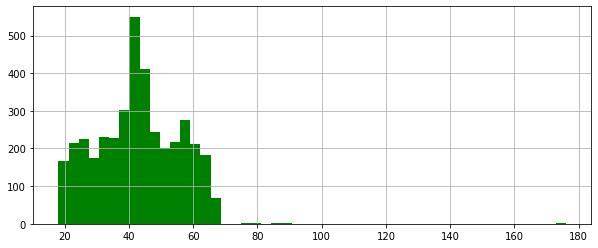

In [120]:
#age distribution
coustmer_data['age'].hist(color='green',bins=50,figsize=(10,4))
#we can see some outliers iets the age 172 is a missentry
#the main coustmers are inbetween age group of 33 & 52


In [123]:
coustmer_data[coustmer_data['age']>100]
#thats a miss entry 


,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age
33,34,Jephthah,Bachmann,U,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,No,20.0,176.0


In [127]:
transitiondata[transitiondata['customer_id']==34]
#we cannot drop the id 34 because that coustmer has done many purchases

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1038,1039,8,34,2017-07-01,TRUE,Approved,Solex,Road,medium,small,1703.52,1516.13,2011-04-16
1106,1107,15,34,2017-08-22,FALSE,Approved,Norco Bicycles,Standard,low,medium,958.74,748.90,2005-12-07
2637,2638,83,34,2017-04-07,FALSE,Approved,Solex,Touring,medium,large,2083.94,675.03,2013-09-16
9043,9044,12,34,2017-02-13,FALSE,Approved,WeareA2B,Standard,medium,medium,1231.15,161.60,2004-08-17
9791,9792,60,34,2017-06-25,TRUE,Approved,Giant Bicycles,Standard,high,small,1977.36,1759.85,2011-08-24
12082,12083,13,34,2017-07-23,FALSE,Approved,Solex,Standard,medium,medium,1163.89,589.27,2016-07-09
17807,17808,96,34,2017-04-10,TRUE,Approved,WeareA2B,Road,low,small,1172.78,1043.77,2002-10-10
19290,19291,65,34,2017-09-19,FALSE,Approved,WeareA2B,Standard,medium,medium,1807.45,778.69,2015-05-21


gender
Female    98359
Male      93483
U          3718
Name: past_3_years_bike_related_purchases, dtype: int64


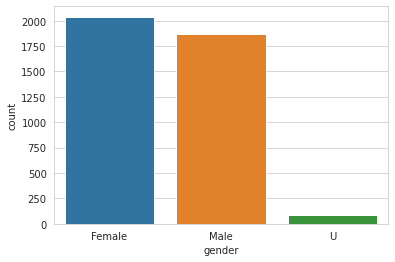

In [175]:
sns.set_style('whitegrid')
sns.countplot(x='gender',data=coustmer_data)
print(coustmer_data.groupby('gender')['past_3_years_bike_related_purchases'].sum())

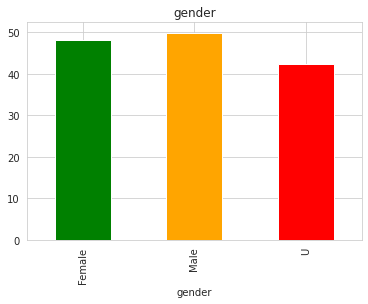

gender
Female    48.238843
Male      49.910838
U         42.250000
Name: past_3_years_bike_related_purchases, dtype: float64


In [162]:
import matplotlib.pyplot as plt
coustmer_data.groupby('gender')['past_3_years_bike_related_purchases'].mean().plot.bar(coustmer_data['gender'],color=['green','orange','red'])
plt.title('gender')
plt.show()
print(coustmer_data.groupby('gender')['past_3_years_bike_related_purchases'].mean())

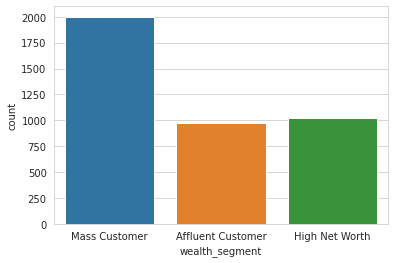

In [131]:
sns.set_style('whitegrid')
sns.countplot(x='wealth_segment',data=coustmer_data)

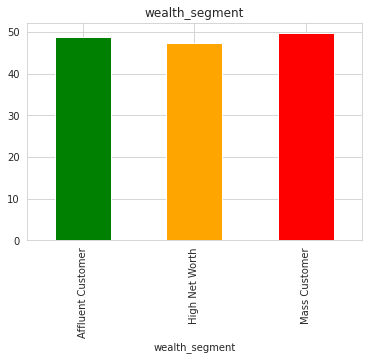

wealth_segment
Affluent Customer    48.847804
High Net Worth       47.287953
Mass Customer        49.728500
Name: past_3_years_bike_related_purchases, dtype: float64


In [164]:
coustmer_data.groupby('wealth_segment')['past_3_years_bike_related_purchases'].mean().plot.bar(coustmer_data['wealth_segment'],color=['green','orange','red'])
plt.title('wealth_segment')
plt.show()
print(coustmer_data.groupby('wealth_segment')['past_3_years_bike_related_purchases'].mean())

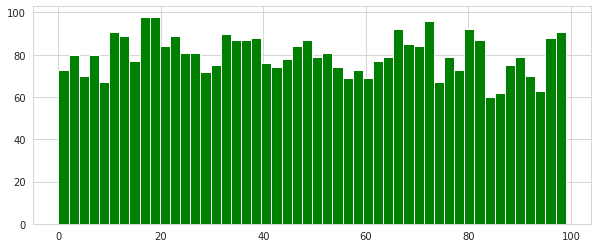

In [132]:
#purchase distribution
coustmer_data['past_3_years_bike_related_purchases'].hist(color='green',bins=50,figsize=(10,4))

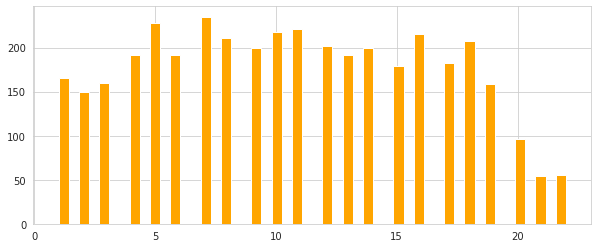

In [139]:
#Tenure refers to the number of months that a customer has subscribed for. 
#The tenure for a churning customer indicates the number of months that they spent as a subscriber.
coustmer_data['tenure'].hist(color='orange',bins=50,figsize=(10,4))

In [144]:
coustmer_data.info()
print('n.o of job titles:',coustmer_data['job_title'].nunique())
print('n.o of job_industry_category  :',coustmer_data['job_industry_category'].nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            4000 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            4000 non-null   object        
 7   job_industry_category                4000 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  owns_car    

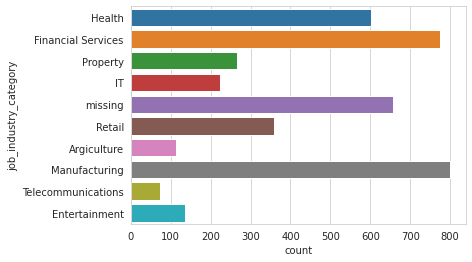

In [146]:
#lets check the job industry catogary
sns.set_style('whitegrid')
sns.countplot(y='job_industry_category',data=coustmer_data)

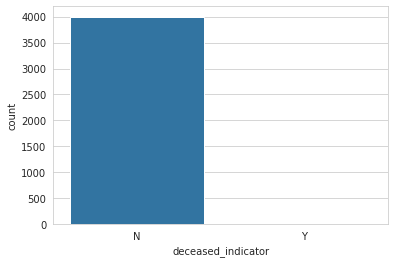

In [148]:
sns.set_style('whitegrid')
sns.countplot(x='deceased_indicator',data=coustmer_data)

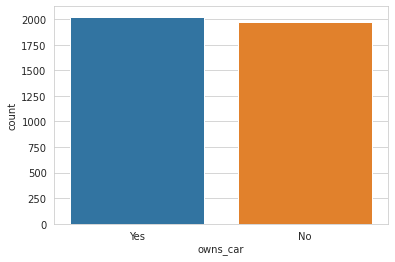

In [149]:
sns.set_style('whitegrid')
sns.countplot(x='owns_car',data=coustmer_data)

## visvalisation of transition data

In [176]:
transitiondata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19803 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19803 non-null  int64         
 1   product_id               19803 non-null  int64         
 2   customer_id              19803 non-null  int64         
 3   transaction_date         19803 non-null  datetime64[ns]
 4   online_order             19803 non-null  object        
 5   order_status             19803 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               19803 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

Standard    14176
Road         3970
Touring      1234
Mountain      423
Name: product_line, dtype: int64


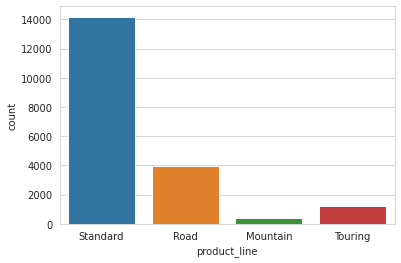

In [178]:
print(transitiondata['product_line'].value_counts())
sns.set_style('whitegrid')
sns.countplot(x='product_line',data=transitiondata)


medium    13826
high       3013
low        2964
Name: product_class, dtype: int64


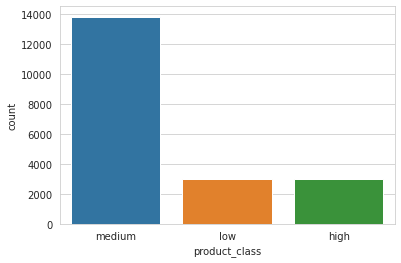

In [179]:
print(transitiondata['product_class'].value_counts())
sns.set_style('whitegrid')
sns.countplot(x='product_class',data=transitiondata)


medium    12990
large      3976
small      2837
Name: product_size, dtype: int64


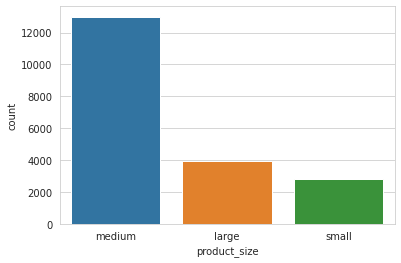

In [181]:
print(transitiondata['product_size'].value_counts())
sns.set_style('whitegrid')
sns.countplot(x='product_size',data=transitiondata)


Solex             4253
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990
Norco Bicycles    2910
Name: brand, dtype: int64


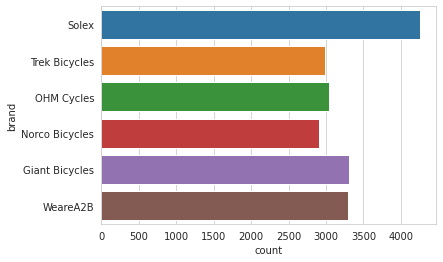

In [184]:
print(transitiondata['brand'].value_counts())
sns.set_style('whitegrid')
sns.countplot(y='brand',data=transitiondata)


Approved     19625
Cancelled      178
Name: order_status, dtype: int64


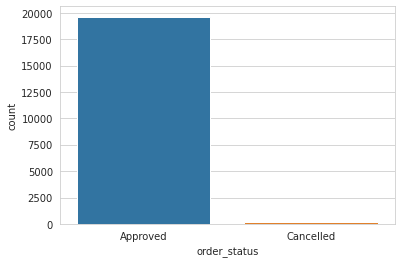

In [185]:
print(transitiondata['order_status'].value_counts())
sns.set_style('whitegrid')
sns.countplot(x='order_status',data=transitiondata)

TRUE       9739
FALSE      9706
missing     358
Name: online_order, dtype: int64


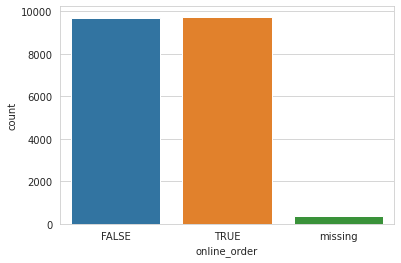

In [186]:
print(transitiondata['online_order'].value_counts())
sns.set_style('whitegrid')
sns.countplot(x='online_order',data=transitiondata)